<a href="https://colab.research.google.com/github/shamsa19/AI-For-Beginners/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

In [9]:
!rm *.pkl
!wget https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz
!gzip -d mnist.pkl.gz

rm: cannot remove '*.pkl': No such file or directory
--2025-01-03 15:54:22--  https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘mnist.pkl.gz’

mnist.pkl.gz            [ <=>                ] 159.67K  --.-KB/s    in 0.1s    

2025-01-03 15:54:22 (1.60 MB/s) - ‘mnist.pkl.gz’ saved [163506]


gzip: mnist.pkl.gz: not in gzip format


In [27]:
import os
import requests
import gzip
import pickle
import random

url = 'https://github.com/mnielsen/neural-networks-and-deep-learning/raw/master/data/mnist.pkl.gz'
filename = 'mnist.pkl.gz'


response = requests.get(url, stream=True)
with open(filename, 'wb') as f:
    for chunk in response.iter_content(chunk_size=8192):
        if chunk:
            f.write(chunk)


with gzip.open(filename, 'rb') as f_in:
    with open(filename[:-3], 'wb') as f_out:
        f_out.write(f_in.read())


if os.path.exists(filename[:-3]):
    with open(filename[:-3], 'rb') as mnist_pickle:

        MNIST = pickle.load(mnist_pickle, encoding='latin1')

else:
    print("Error: mnist.pkl not found. Download or extraction failed.")

In [32]:
import os
import requests
import gzip
import pickle


url = 'https://github.com/mnielsen/neural-networks-and-deep-learning/raw/master/data/mnist.pkl.gz'
filename = 'mnist.pkl.gz'


response = requests.get(url, stream=True)
with open(filename, 'wb') as f:
    for chunk in response.iter_content(chunk_size=8192):
        if chunk:
            f.write(chunk)


with gzip.open(filename, 'rb') as f_in:
    with open(filename[:-3], 'wb') as f_out:
        f_out.write(f_in.read())


if os.path.exists(filename[:-3]):
    with open(filename[:-3], 'rb') as mnist_pickle:
        # The MNIST data is actually a tuple of 3 elements:
        # training_data, validation_data, test_data
        # We need to convert this tuple into the expected dictionary structure.
        training_data, validation_data, test_data = pickle.load(mnist_pickle, encoding='latin1')
        MNIST = {
            'Train': {'Features': training_data[0], 'Labels': training_data[1]},
            'Validation': {'Features': validation_data[0], 'Labels': validation_data[1]},
            'Test': {'Features': test_data[0], 'Labels': test_data[1]}
        }
else:
    print("Error: mnist.pkl not found. Download or extraction failed.")


In [29]:
def train(positive_examples, negative_examples, num_iterations = 100):
    num_dims = positive_examples.shape[1]
    weights = np.zeros((num_dims,1)) # initialize weights

    pos_count = positive_examples.shape[0]
    neg_count = negative_examples.shape[0]

    report_frequency = 10

    for i in range(num_iterations):
        pos = random.choice(positive_examples)
        neg = random.choice(negative_examples)

        z = np.dot(pos, weights)
        if z < 0:
            weights = weights + pos.reshape(weights.shape)

        z  = np.dot(neg, weights)
        if z >= 0:
            weights = weights - neg.reshape(weights.shape)

        if i % report_frequency == 0:
            pos_out = np.dot(positive_examples, weights)
            neg_out = np.dot(negative_examples, weights)
            pos_correct = (pos_out >= 0).sum() / float(pos_count)
            neg_correct = (neg_out < 0).sum() / float(neg_count)
            print("Iteration={}, pos correct={}, neg correct={}".format(i,pos_correct,neg_correct))

    return weights

In [28]:
def set_mnist_pos_neg(positive_label , negative_label):
   positive_indices = [i for i, j in enumerate(MNIST['Train']['Labels']) if j == positive_label]
   negative_indices = [i for i, j in enumerate(MNIST['Train']['Labels']) if j in negative_label]

   positive_images = MNIST['Train']['Features'][positive_indices]
   negative_images = MNIST['Train']['Features'][negative_indices]

   return positive_images, negative_images

In [30]:
def accuracy(weights, test_x, test_labels):
    res = np.dot(np.c_[test_x,np.ones(len(test_x))],weights)
    return (res.reshape(test_labels.shape)*test_labels>=0).sum()/float(len(test_labels))


In [31]:
def classify(image, weights_list):
  scores= np.array([np.dot(image,weights) for weights in weights_list])
  predicted_label = np.argmax(scores)
  return predicted_label

In [33]:
weights_list = []
for digit in range(10):
  print(f"Training for digit {digit}")
  positive_examples, negative_examples = set_mnist_pos_neg(digit, [i for i in range(10) if i != digit])
  weights = train(positive_examples , negative_examples)
  weights_list.append(weights)


test_images = MNIST['Test']['Features']
test_labels = MNIST['Test']['Labels']

correct = 0
for i ,image in enumerate(test_images):
  predicted_label = classify(image, weights_list)
  if predicted_label == test_labels[i]:
    correct += 1

accuracy = correct /float(len(test_labels)) * 100
print(f"Accuracy: {accuracy}")




Training for digit 0
Iteration=0, pos correct=0.0, neg correct=1.0
Iteration=10, pos correct=0.7049878345498783, neg correct=0.955045708706843
Iteration=20, pos correct=0.9687753446877534, neg correct=0.8663131268305672
Iteration=30, pos correct=0.9243714517437145, neg correct=0.9637658649152392
Iteration=40, pos correct=0.9651257096512571, neg correct=0.8819339664506968
Iteration=50, pos correct=0.8886861313868614, neg correct=0.9765465518771634
Iteration=60, pos correct=0.9097729115977291, neg correct=0.974083606993876
Iteration=70, pos correct=0.9097729115977291, neg correct=0.974083606993876
Iteration=80, pos correct=0.9876317923763179, neg correct=0.8310331055294222
Iteration=90, pos correct=0.9843876723438767, neg correct=0.8608768971332209
Training for digit 1
Iteration=0, pos correct=0.0, neg correct=1.0
Iteration=10, pos correct=0.9867911236350828, neg correct=0.8230449889445423
Iteration=20, pos correct=0.9181049665375132, neg correct=0.977821397951356
Iteration=30, pos corre

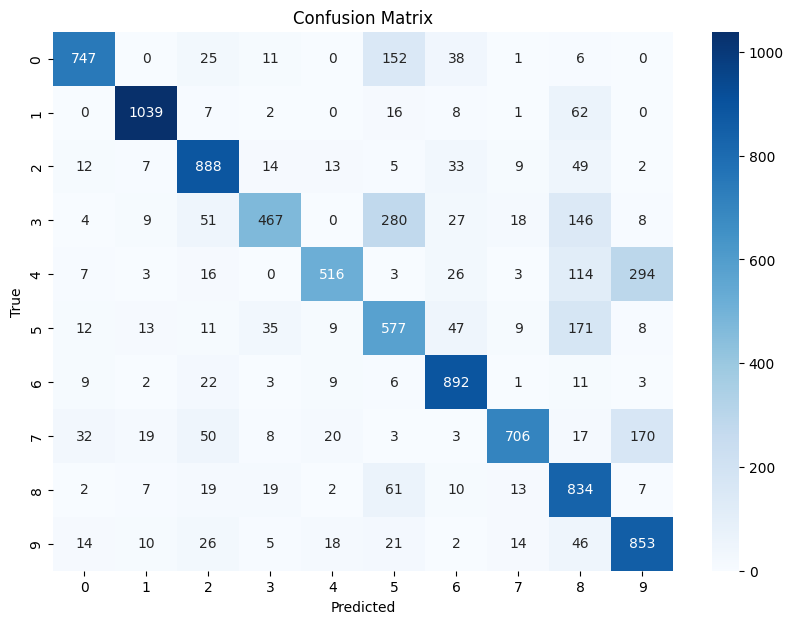

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

predicted_labels = [classify(image, weights_list) for image in test_images]
conf_matrix = confusion_matrix(test_labels, predicted_labels)

class_names = [str(i) for i in range(10)]
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()